In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

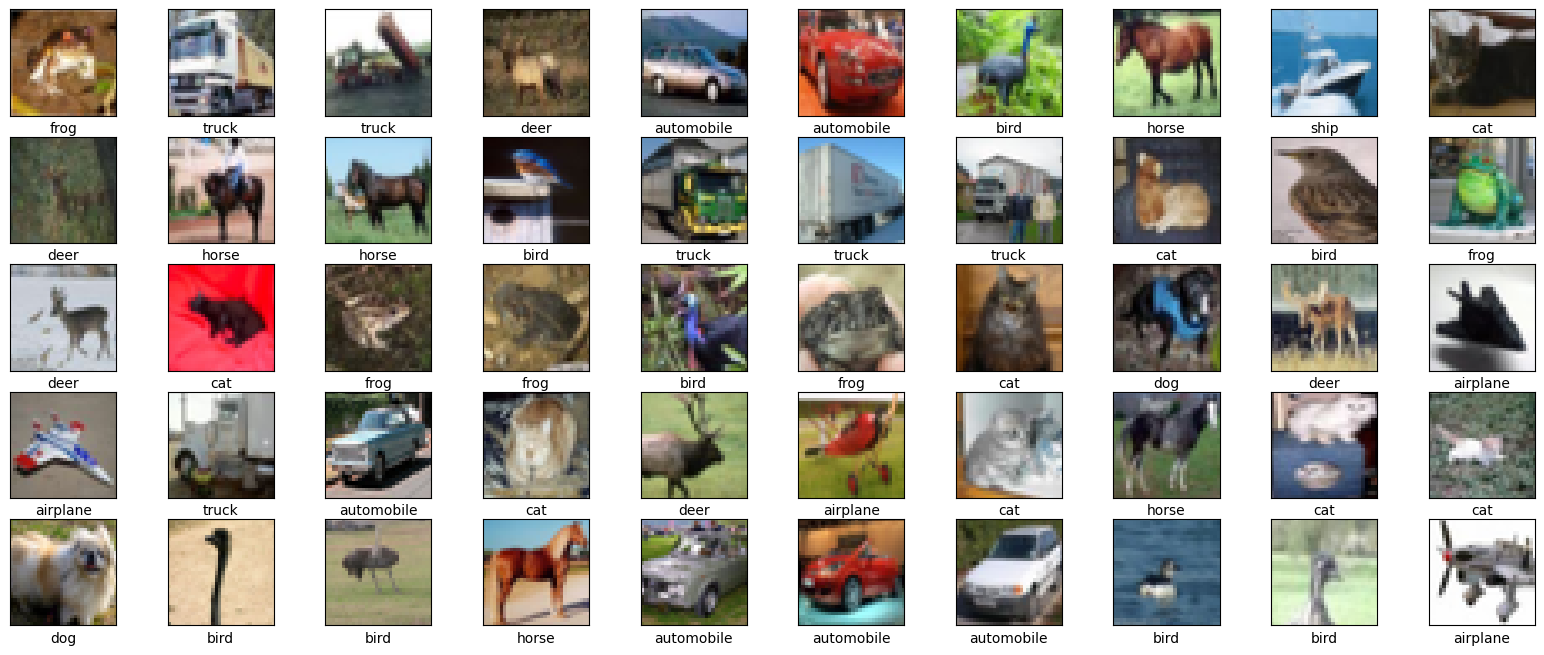

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential([

    keras.Input(shape=(32,32,3)),


    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),


    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [7]:
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 66s 52ms/step - loss: 1.6774 - accuracy: 0.3941 - val_loss: 1.3760 - val_accuracy: 0.5112
Epoch 2/10
1250/1250 [==============================] - 66s 53ms/step - loss: 1.2977 - accuracy: 0.5366 - val_loss: 1.2308 - val_accuracy: 0.5628
Epoch 3/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.1329 - accuracy: 0.5999 - val_loss: 1.0581 - val_accuracy: 0.6247
Epoch 4/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.0157 - accuracy: 0.6433 - val_loss: 1.0974 - val_accuracy: 0.6144
Epoch 5/10
1250/1250 [==============================] - 68s 55ms/step - loss: 0.9268 - accuracy: 0.6762 - val_loss: 1.0438 - val_accuracy: 0.6422
Epoch 6/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.8581 - accuracy: 0.7027 - val_loss: 0.9772 - val_accuracy: 0.6659
Epoch 7/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.7977 - accuracy: 0.7220 - val_loss: 0.9866 -

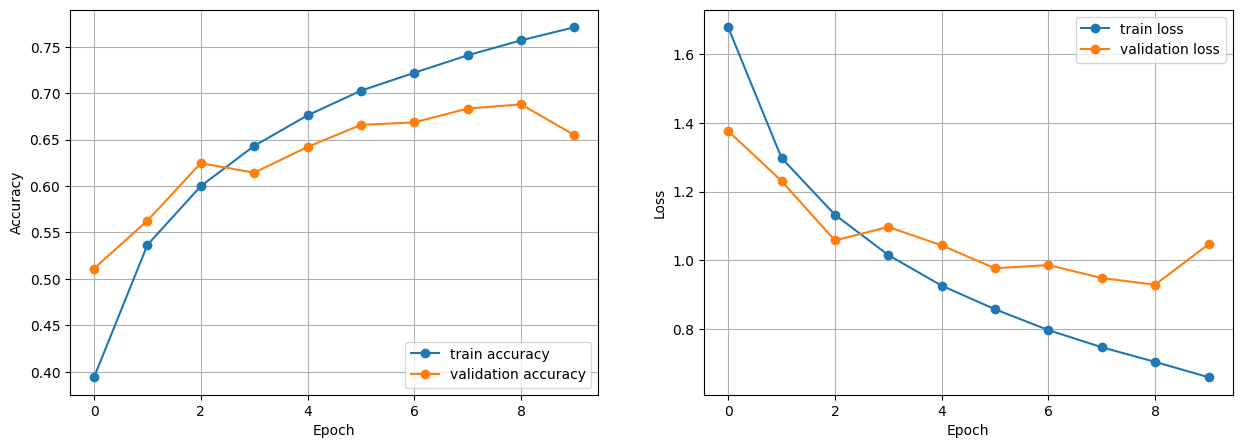

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 13ms/step - loss: 1.1095 - accuracy: 0.6455

Test Accuracy: 0.6455000042915344

Test Loss: 1.109512448310852


In [11]:
predictions = model.predict(X_test)

313/313 [==============================] - 7s 22ms/step


In [12]:
predictions[0]

array([3.33213247e-04, 4.10977691e-06, 4.89691598e-03, 5.80273092e-01,
       1.39720235e-02, 3.99341643e-01, 1.06818974e-03, 5.05747266e-05,
       1.08469712e-05, 4.93957668e-05], dtype=float32)

In [13]:
np.argmax(predictions[0])

3

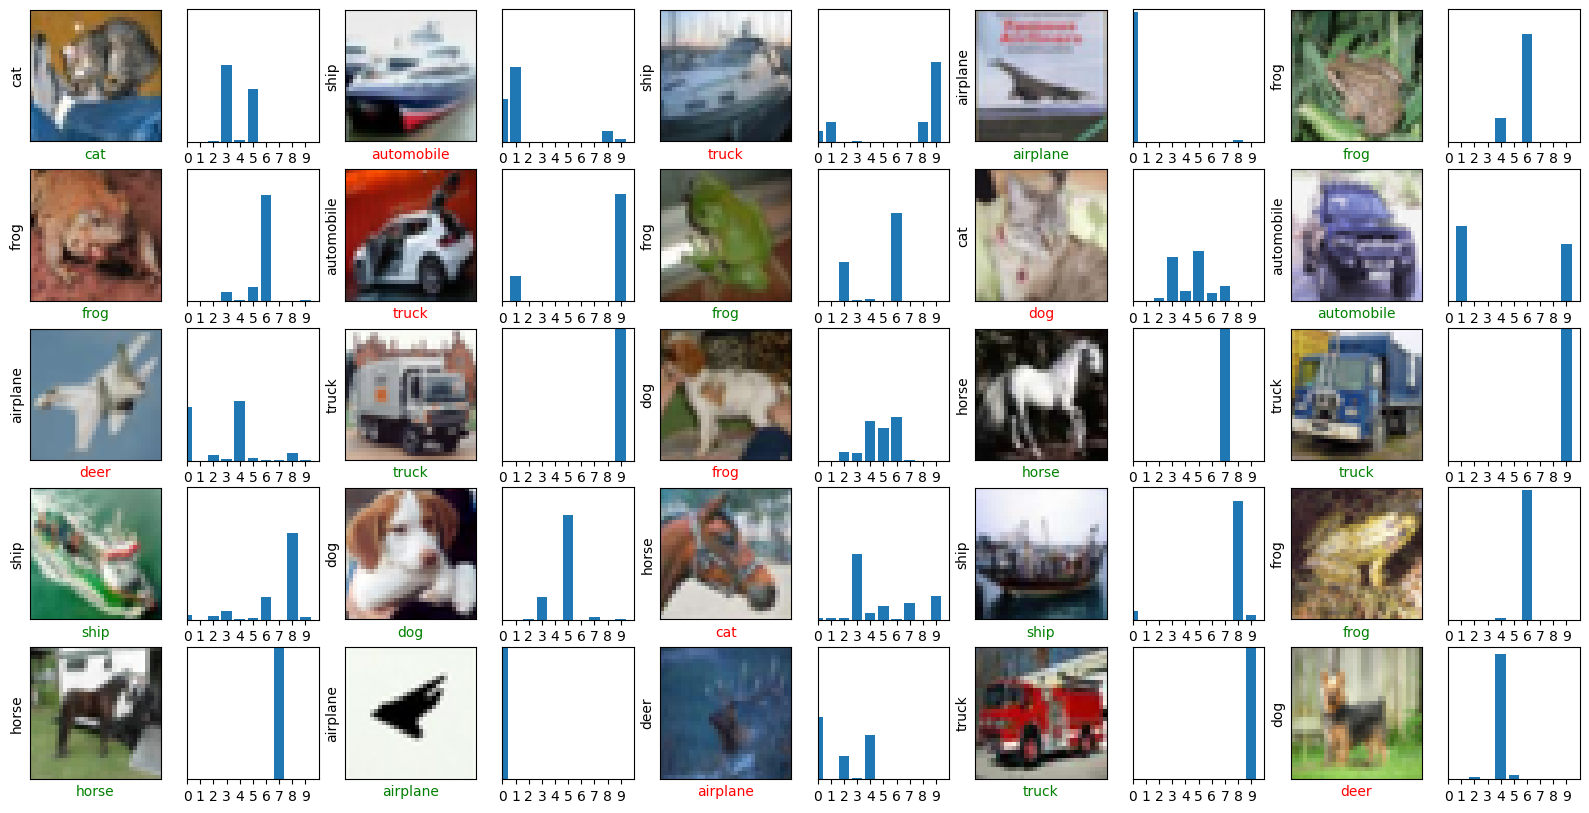

In [14]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

RMSprop Optimizer

RMSprop operates as a dynamic optimization algorithm, adjusting the learning rate for each parameter by taking into account the square root of the exponentially weighted moving average of squared gradients.

Key Parameters:

Learning Rate: Similar to Adam, RMSprop utilizes a flexible learning rate that adapts according to historical gradients.
Learning Rate Schedule: It can employ a steady learning rate or incorporate a strategy for learning rate decay.
Momentum: In contrast to certain optimization algorithms, RMSprop doesn't include momentum; rather, it observes the exponentially weighted moving average of squared gradients.
Weight Decay: Much like Adam and SGD, RMSprop provides optional support for L2 regularization via weight decay.

In [15]:
model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 70s 55ms/step - loss: 0.6310 - accuracy: 0.7809 - val_loss: 0.9713 - val_accuracy: 0.6815
Epoch 2/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.5963 - accuracy: 0.7935 - val_loss: 0.9937 - val_accuracy: 0.6910
Epoch 3/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.5667 - accuracy: 0.8025 - val_loss: 1.0353 - val_accuracy: 0.6883
Epoch 4/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.5419 - accuracy: 0.8123 - val_loss: 0.9835 - val_accuracy: 0.6896
Epoch 5/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.5168 - accuracy: 0.8208 - val_loss: 1.1183 - val_accuracy: 0.6817
Epoch 6/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.4927 - accuracy: 0.8284 - val_loss: 1.1256 - val_accuracy: 0.6814
Epoch 7/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.4787 - accuracy: 0.8348 - val_loss: 1.2423 -

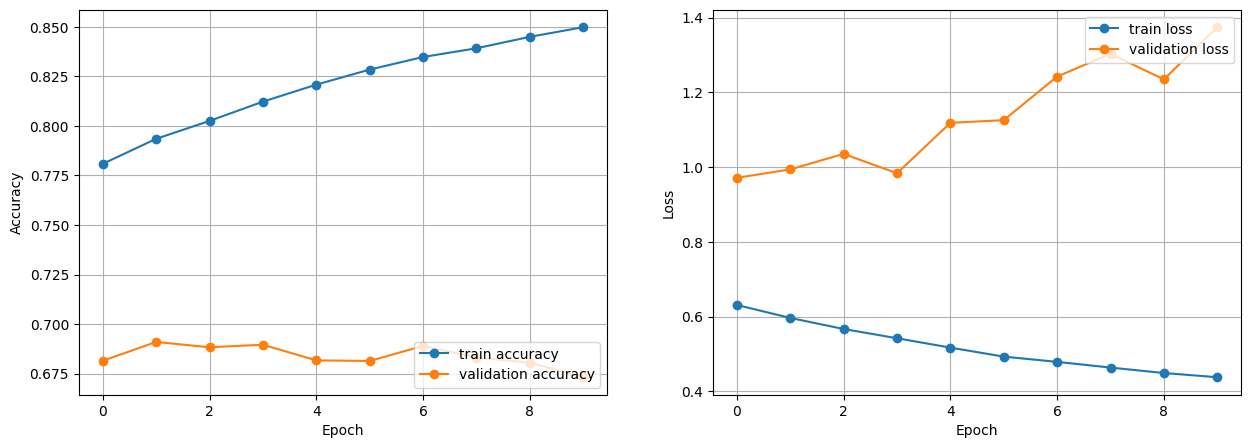

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 13ms/step - loss: 1.4080 - accuracy: 0.6745

Test Accuracy: 0.6744999885559082

Test Loss: 1.407989501953125


SGD - Optimizer

Stochastic Gradient Descent, abbreviated as SGD, stands as the foundational optimization algorithm. It updates model parameters by using the gradients of the loss function with respect to each parameter, employing a consistent learning rate.

Parameters

Consistency in learning rate application across all parameters is a characteristic of SGD throughout training. While it doesn't inherently include adaptive learning rate schedules, users have the option to manually introduce learning rate decay over time. Momentum is a feature of SGD, involving an additional parameter to control the impact of the previous gradient direction on the current update. Like Adam, SGD allows for optional L2 regularization, contributing to weight decay.

In [19]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 65s 51ms/step - loss: 0.3916 - accuracy: 0.8655 - val_loss: 1.3320 - val_accuracy: 0.6896
Epoch 2/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.3001 - accuracy: 0.8958 - val_loss: 1.3973 - val_accuracy: 0.6917
Epoch 3/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.2579 - accuracy: 0.9097 - val_loss: 1.4800 - val_accuracy: 0.6979
Epoch 4/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.2255 - accuracy: 0.9230 - val_loss: 1.5965 - val_accuracy: 0.6982
Epoch 5/10
1250/1250 [==============================] - 64s 52ms/step - loss: 0.2187 - accuracy: 0.9231 - val_loss: 1.5795 - val_accuracy: 0.6980
Epoch 6/10
1250/1250 [==============================] - 63s 51ms/step - loss: 0.1936 - accuracy: 0.9338 - val_loss: 1.6352 - val_accuracy: 0.6983
Epoch 7/10
1250/1250 [==============================] - 68s 54ms/step - loss: 0.1845 - accuracy: 0.9363 - val_loss: 1.7333 -

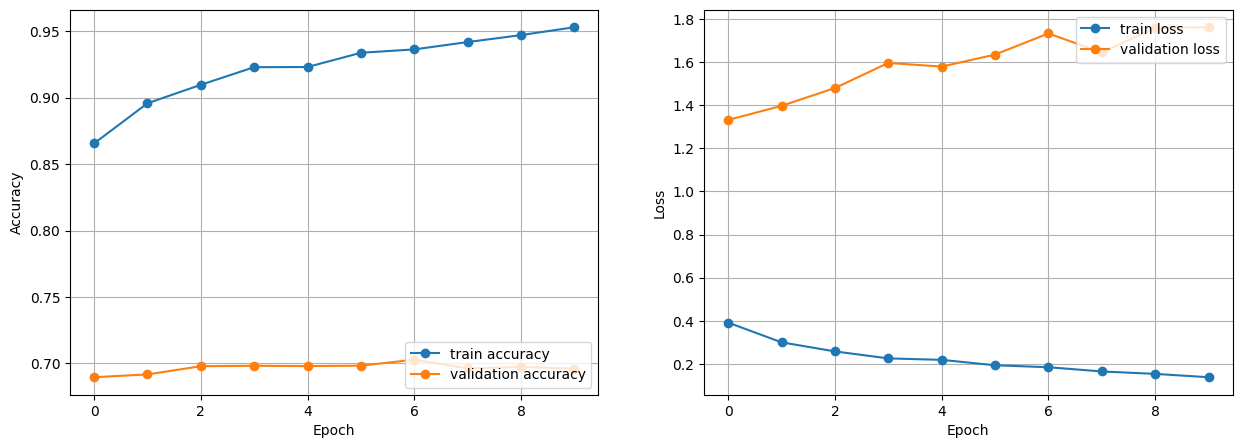

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 6s 20ms/step - loss: 1.8390 - accuracy: 0.6824

Test Accuracy: 0.6823999881744385

Test Loss: 1.8390476703643799


Adam – Optimizer

Adam emerges as a frequently utilized optimization algorithm, blending the strengths of RMSprop and momentum-based methods. It dynamically modifies the learning rate for each parameter and utilizes exponential moving averages of gradients to update weights.

Adam utilizes an adaptive learning rate, dynamically adjusting it for each parameter by considering historical gradients. It allows for a time-based learning rate schedule or offers customization options. In contrast to standard stochastic gradient descent (SGD), Adam does not rely on conventional momentum; rather, it computes adaptive learning rates using first and second moments. Additionally, akin to RMSprop and SGD, Adam allows optional L2 regularization, imposing penalties on substantial parameter values to counteract overfitting.

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 64s 50ms/step - loss: 0.3478 - accuracy: 0.8791 - val_loss: 1.4835 - val_accuracy: 0.6901
Epoch 2/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.3338 - accuracy: 0.8836 - val_loss: 1.4636 - val_accuracy: 0.6755
Epoch 3/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.3270 - accuracy: 0.8859 - val_loss: 1.6536 - val_accuracy: 0.6841
Epoch 4/10
1250/1250 [==============================] - 62s 49ms/step - loss: 0.3029 - accuracy: 0.8944 - val_loss: 1.4742 - val_accuracy: 0.6858
Epoch 5/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.2845 - accuracy: 0.9001 - val_loss: 1.5564 - val_accuracy: 0.6858
Epoch 6/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.2786 - accuracy: 0.9010 - val_loss: 1.4812 - val_accuracy: 0.6896
Epoch 7/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.2704 - accuracy: 0.9035 - val_loss: 1.6694 -

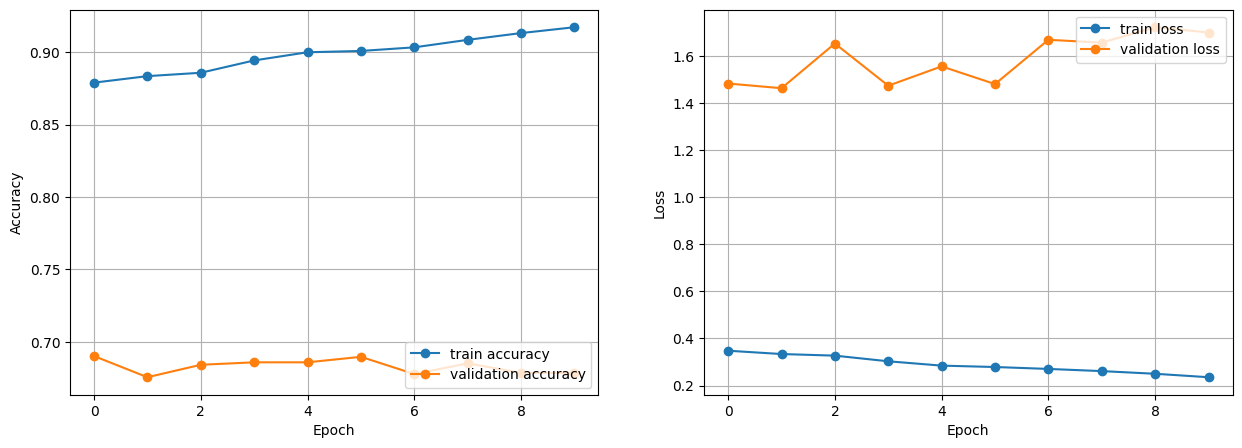

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [26]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 13ms/step - loss: 1.7917 - accuracy: 0.6676

Test Accuracy: 0.6675999760627747

Test Loss: 1.791738510131836
